In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("s3://aisle3-ml-datasets/scraped-datasets/pcpricetracker_in.csv")
df

,id,title,merchant,category
0,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB Snow Edition + Type C,Vedant Computers,Cabinets
1,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB (ATX) Mid Tower Ca...,MDComputers,Cabinets
2,00858939cd4a866b9dfb0f59f232a4a2,LIAN LI LANCOOL II MESH RGB EATX CABINET SNOW ...,PCStudio,Cabinets
3,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB Cabinet With USB T...,Elitehubs,Cabinets
4,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB Snow Edition + Typ...,ITDepot,Cabinets
...,...,...,...,...
10661,fcef1e4f2fa001b2fa2edec62d73d7c8,Samsung 870 EVO 1TB Internal SSD (MZ-77E1T0BW),MDComputers,SSD
10662,fcef1e4f2fa001b2fa2edec62d73d7c8,SAMSUNG 870 EVO 1TB INTERNAL SSD (MZ-77E1T0BW),PCStudio,SSD
10663,fcef1e4f2fa001b2fa2edec62d73d7c8,Samsung 870 EVO 1TB SATA 3 Internal SSD (MZ-77...,ITDepot,SSD
10664,fcf171407b31df1dd693b7dba05c33aa,Addlink S95 2TB M.2 NVMe Gen4 Internal SSD (AD...,MDComputers,SSD


<AxesSubplot:>

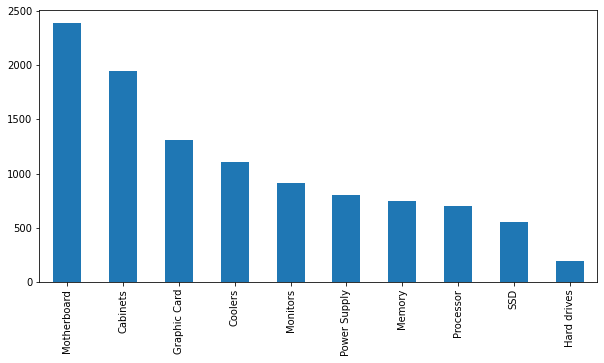

In [3]:
df.category.value_counts().plot.bar(figsize=(10,5))

<AxesSubplot:>

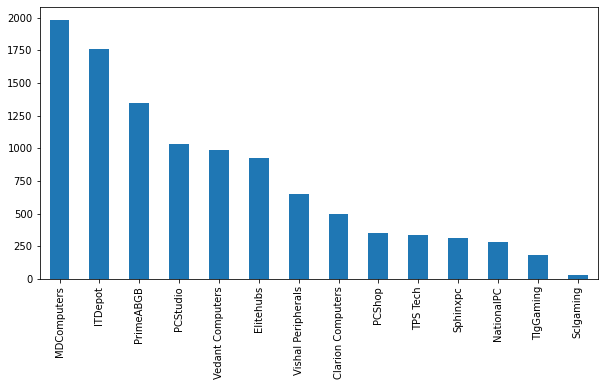

In [4]:
df.merchant.value_counts().plot.bar(figsize=(10, 5))

In [5]:
df.id.nunique()

3139

<AxesSubplot:>

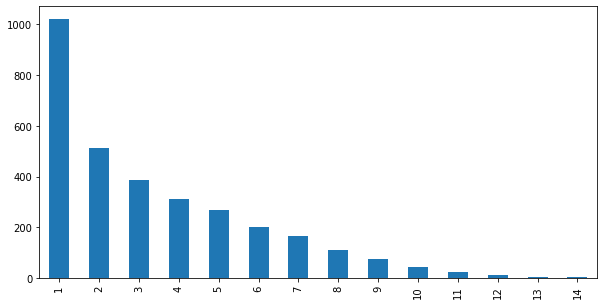

In [6]:
dist = df.id.value_counts()
dist.value_counts().plot.bar(figsize=(10, 5))

In [7]:
df = df[df.id.isin(dist[dist > 1].index)].reset_index(drop=True)
df

,id,title,merchant,category
0,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB Snow Edition + Type C,Vedant Computers,Cabinets
1,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB (ATX) Mid Tower Ca...,MDComputers,Cabinets
2,00858939cd4a866b9dfb0f59f232a4a2,LIAN LI LANCOOL II MESH RGB EATX CABINET SNOW ...,PCStudio,Cabinets
3,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB Cabinet With USB T...,Elitehubs,Cabinets
4,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB Snow Edition + Typ...,ITDepot,Cabinets
...,...,...,...,...
9641,faca8183bb23851b3af8f3f77e298730,"ADATA Ultimate SU650 120GB 2.5""",Vedant Computers,SSD
9642,faca8183bb23851b3af8f3f77e298730,Adata Ultimate SU650 120GB 3D NAND Internal SS...,MDComputers,SSD
9643,fcef1e4f2fa001b2fa2edec62d73d7c8,Samsung 870 EVO 1TB Internal SSD (MZ-77E1T0BW),MDComputers,SSD
9644,fcef1e4f2fa001b2fa2edec62d73d7c8,SAMSUNG 870 EVO 1TB INTERNAL SSD (MZ-77E1T0BW),PCStudio,SSD


In [8]:
df.id.nunique()

2119

## Reserve 30% of clusters for testing

In [9]:
train_ids, test_ids = train_test_split(df.id.unique(), test_size=0.3, random_state=42)
len(train_ids), len(test_ids)

(1483, 636)

In [10]:
train_df = df[df.id.isin(train_ids)].reset_index(drop=True)
print(train_df.shape)
test_df = df[df.id.isin(test_ids)].reset_index(drop=True)
print(test_df.shape)

(6658, 4)
(2988, 4)


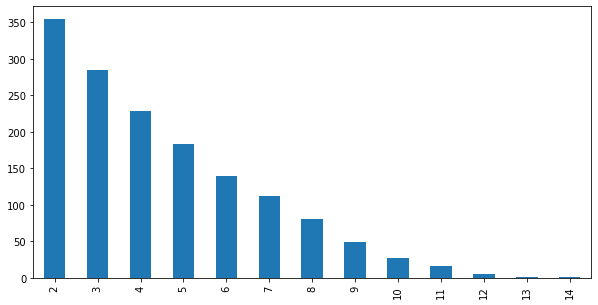

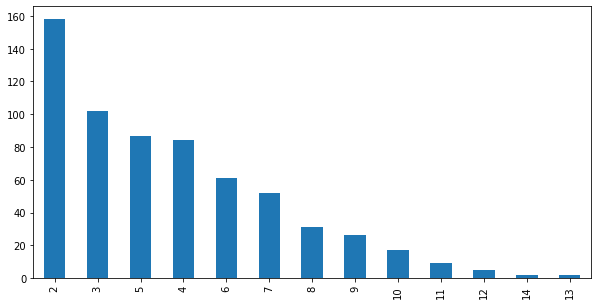

In [11]:
train_df.id.value_counts().value_counts().plot.bar(figsize=(10, 5))
plt.show()
test_df.id.value_counts().value_counts().plot.bar(figsize=(10, 5))
plt.show()

## Create validation split 

In [12]:
val = list()

min_for_val = 2
for id, count in train_df.id.value_counts().iteritems():
    if count > min_for_val and np.random.random() < 0.5:
        val.extend(np.random.choice(train_df[train_df.id == id].index, 1))
val = np.array(val)
len(val)

553

In [13]:
val_df = train_df.loc[val].reset_index(drop=True)
val_df

,id,title,merchant,category
0,7a182ce3c511a1855096383299cdb109,AMD RYZEN 7 5800X PROCESSOR,PCStudio,Processor
1,d37825f104cad44f05fb98aad4e9f363,AMD Ryzen 9 5900X 12 Cores Processor,NationalPC,Processor
2,629578c2c546616dd5416358a5c106b5,MSI MAG B550 TOMAHAWK AMD Motherboard,ITDepot,Motherboard
3,6ae6da8e6907fbd7eec570521cfd2b96,MSI B550M PRO-VDH WIFI Motherboard (AMD Socket...,MDComputers,Motherboard
4,d70f4cb62c4f6a0cdda475c4b168884a,Intel 10th Gen Comet Lake Core i7-10700F Proce...,PrimeABGB,Processor
...,...,...,...,...
548,e039821bd918afc35802dba117157617,"ASUS VG258QR Gaming Monitor â€“ 24.5â€, Full H...",PrimeABGB,Monitors
549,0cd42cac861284921ce59ac05faa96a9,SAMSUNG LED 24 LF24T352FHW,Vishal Peripherals,Monitors
550,df7cce455eae8717c07bc9a540042154,LG 25UM58-P Ultra wide Borderless Monitor,PCStudio,Monitors
551,428edc310a0b9238c6caa046aeb172dd,METALLIC GEAR NEO SILENT MID-TOWER ATX CABINET...,PCStudio,Cabinets


In [14]:
val_df.id.value_counts().value_counts()

1    553
Name: id, dtype: int64

In [15]:
train_df = train_df.loc[~train_df.index.isin(val)].reset_index(drop=True)
train_df

,id,title,merchant,category
0,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB Snow Edition + Type C,Vedant Computers,Cabinets
1,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB (ATX) Mid Tower Ca...,MDComputers,Cabinets
2,00858939cd4a866b9dfb0f59f232a4a2,LIAN LI LANCOOL II MESH RGB EATX CABINET SNOW ...,PCStudio,Cabinets
3,00858939cd4a866b9dfb0f59f232a4a2,Lian Li Lancool II Mesh RGB Cabinet With USB T...,Elitehubs,Cabinets
4,00b478fcadaa51f61b8df1d6c6148bbe,PHANTEKS ECLIPSE P350X (E-ATX) Mid Tower Cabin...,PCStudio,Cabinets
...,...,...,...,...
6100,faca8183bb23851b3af8f3f77e298730,"ADATA Ultimate SU650 120GB 2.5""",Vedant Computers,SSD
6101,faca8183bb23851b3af8f3f77e298730,Adata Ultimate SU650 120GB 3D NAND Internal SS...,MDComputers,SSD
6102,fcef1e4f2fa001b2fa2edec62d73d7c8,Samsung 870 EVO 1TB Internal SSD (MZ-77E1T0BW),MDComputers,SSD
6103,fcef1e4f2fa001b2fa2edec62d73d7c8,SAMSUNG 870 EVO 1TB INTERNAL SSD (MZ-77E1T0BW),PCStudio,SSD


<AxesSubplot:>

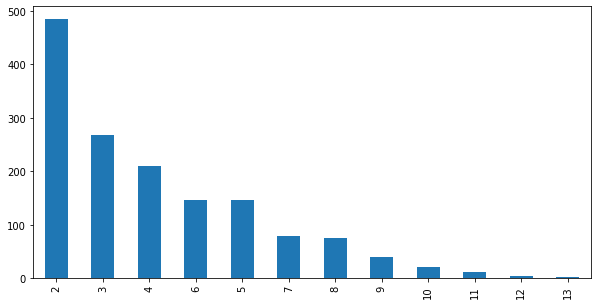

In [16]:
train_df.id.value_counts().value_counts().plot.bar(figsize=(10, 5))

In [18]:
train_df.to_csv("s3://aisle3-ml-datasets/product-matching/pcpricetracker/train.csv", index=False)
val_df.to_csv("s3://aisle3-ml-datasets/product-matching/pcpricetracker/val.csv", index=False)
test_df.to_csv("s3://aisle3-ml-datasets/product-matching/pcpricetracker/test.csv", index=False)